In [1]:
import os
data_path = ['data']

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
filepath = os.sep.join(data_path + ['qsar_aquatic_toxicity.csv'])
data = pd.read_csv(filepath, sep = ";")

In [4]:
data.head()

,tpsa,Saacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,QR
0,0.00,0.0,0,2.419,1.225,0.667,0,0,3.740
1,0.00,0.0,0,2.638,1.401,0.632,0,0,4.330
2,9.23,11.0,0,5.799,2.930,0.486,0,0,7.019
3,9.23,11.0,0,5.453,2.887,0.495,0,0,6.723
4,9.23,11.0,0,4.068,2.758,0.695,0,0,5.979


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tpsa    546 non-null    float64
 1   Saacc   546 non-null    float64
 2   H-050   546 non-null    int64  
 3   MLOGP   546 non-null    float64
 4   RDCHI   546 non-null    float64
 5   GATS1p  546 non-null    float64
 6   nN      546 non-null    int64  
 7   C-040   546 non-null    int64  
 8   QR      546 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 38.5 KB


In [6]:
df = data.copy()

In [7]:
df.describe()

,tpsa,Saacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,QR
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,48.472930,58.869018,0.937729,2.313493,2.492299,1.046264,1.003663,0.353480,4.658421
std,46.763983,68.166554,1.618632,1.741797,0.811004,0.403677,1.397240,0.806827,1.665215
min,0.000000,0.000000,0.000000,-6.446000,1.000000,0.281000,0.000000,0.000000,0.122000
25%,15.790000,11.000000,0.000000,1.232500,1.975000,0.737000,0.000000,0.000000,3.601500
50%,40.460000,42.683000,0.000000,2.273500,2.344000,1.020500,1.000000,0.000000,4.516000
75%,70.022500,77.492750,1.000000,3.392750,2.911000,1.266500,2.000000,0.000000,5.607500
max,347.320000,571.952000,18.000000,9.148000,6.439000,2.500000,11.000000,11.000000,10.047000


In [8]:
target_var = df['QR']

(array([ 12.,  14.,  56., 136., 132.,  93.,  62.,  18.,  15.,   8.]),
 array([ 0.122 ,  1.1145,  2.107 ,  3.0995,  4.092 ,  5.0845,  6.077 ,
         7.0695,  8.062 ,  9.0545, 10.047 ]),
 <BarContainer object of 10 artists>)

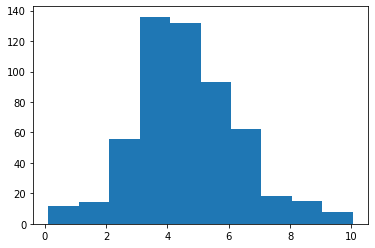

In [9]:
plt.hist(target_var)

In [10]:
from scipy.stats.mstats import normaltest
from scipy.stats import boxcox
normaltest(boxcox(target_var)[0])

#Boxcox gives the normalised form in this case, log and sqrt don't

NormaltestResult(statistic=5.017382606132101, pvalue=0.08137466436033805)

(array([  8.,  10.,  19.,  76., 153., 128.,  90.,  36.,  18.,   8.]),
 array([-0.99978839, -0.20962013,  0.58054814,  1.3707164 ,  2.16088466,
         2.95105292,  3.74122119,  4.53138945,  5.32155771,  6.11172597,
         6.90189424]),
 <BarContainer object of 10 artists>)

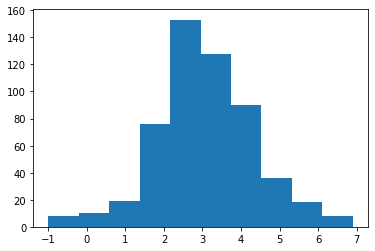

In [11]:
plt.hist(boxcox(target_var)[0])

In [12]:
import seaborn as sns
sns.set_context('paper')
sns.set_style('darkgrid')
sns.set_palette('Set1')

<AxesSubplot:>

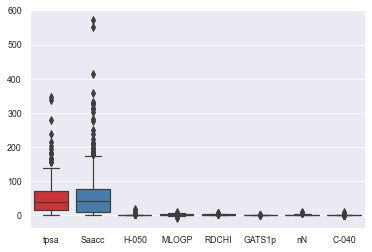

In [13]:
sns.boxplot(data = df.drop(['QR'], axis = 1))

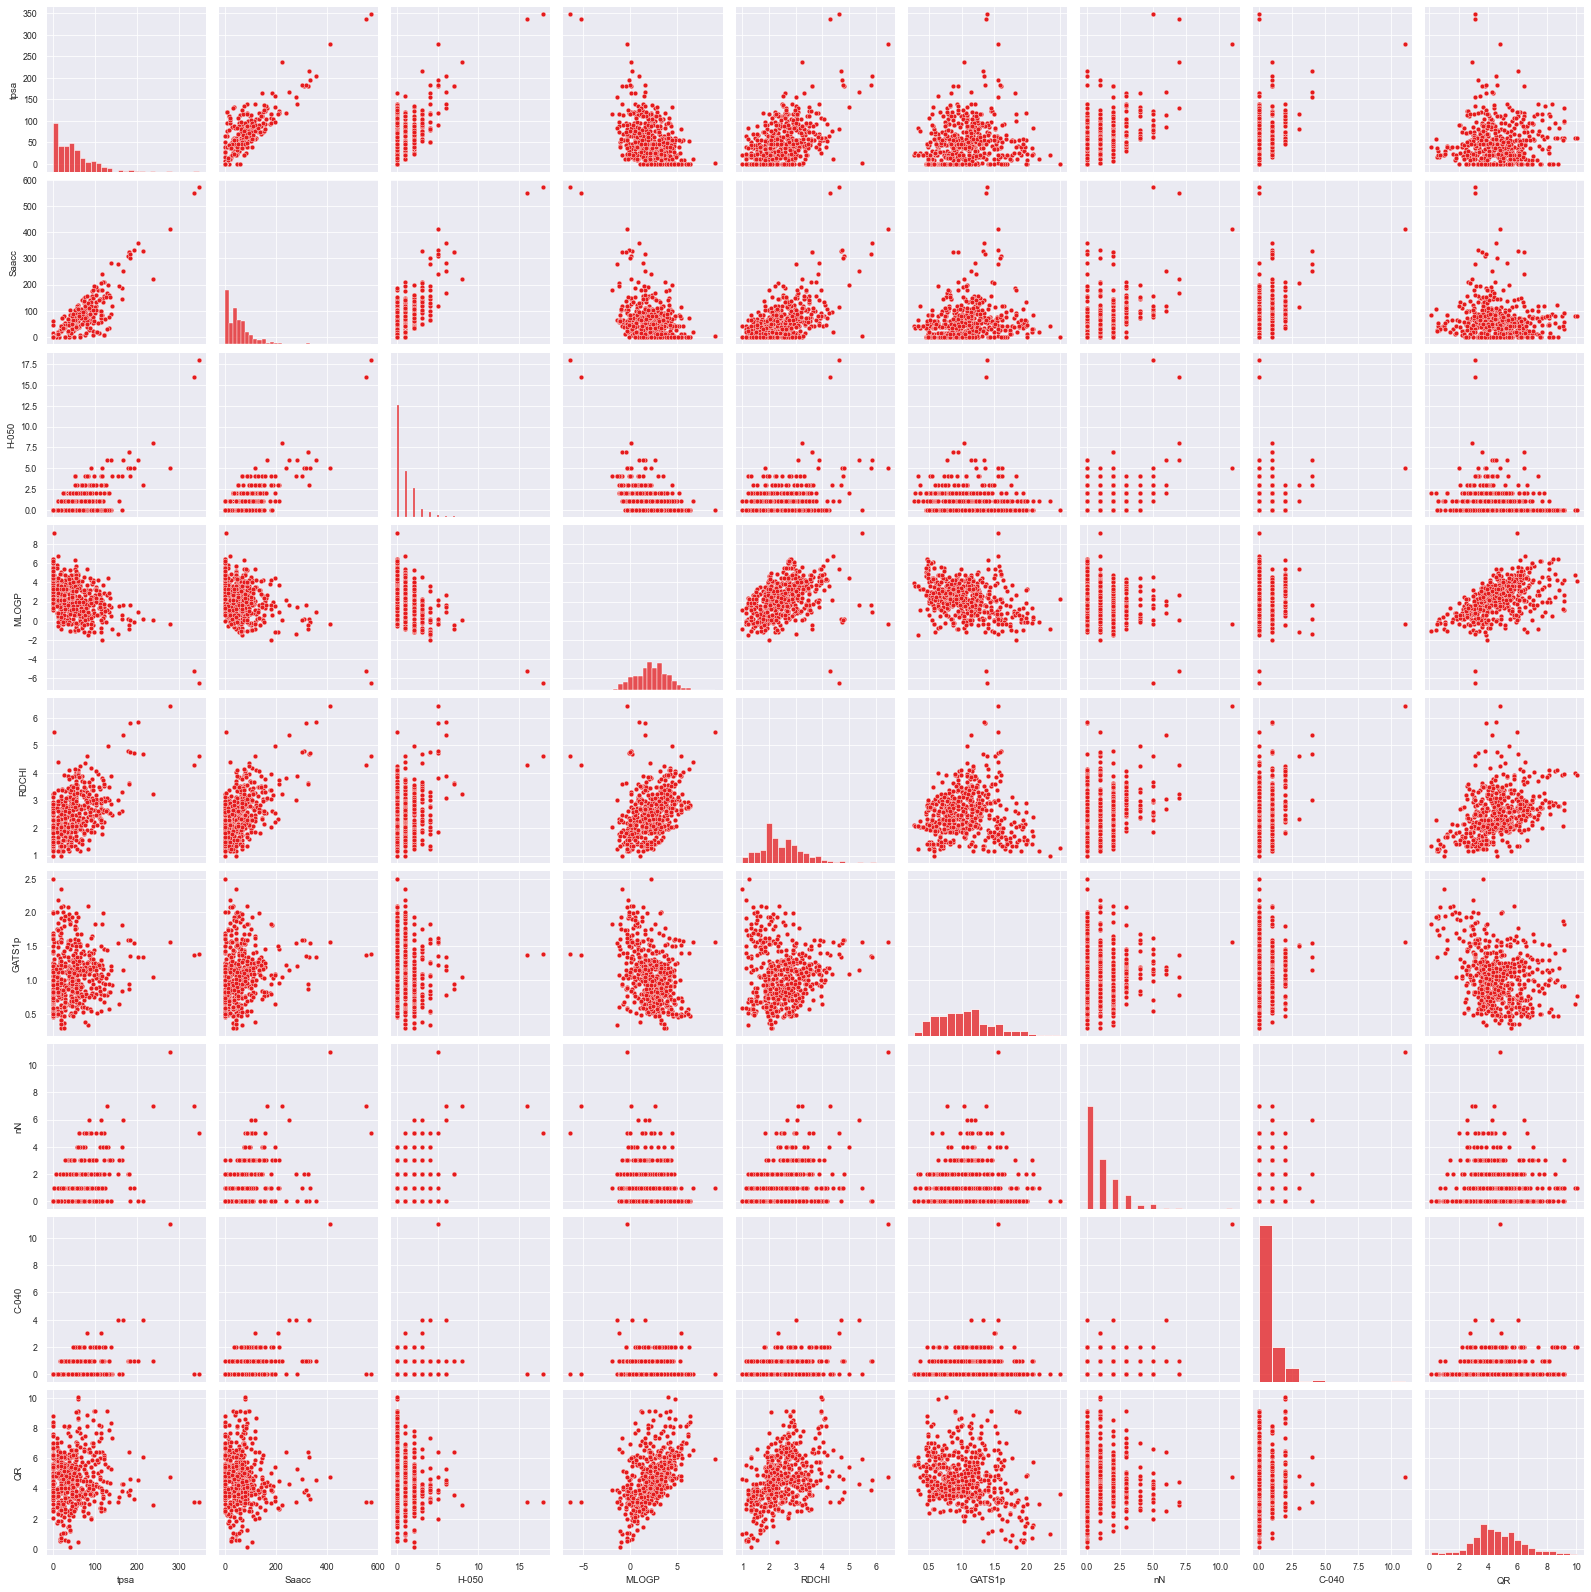

In [14]:
sns.pairplot(df)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import (StandardScaler, PolynomialFeatures)

In [34]:
y_col = 'QR'
X = df.drop(y_col, axis = 1)
y = df[y_col]

In [17]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=10)

In [19]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

In [20]:
y_train_bc = boxcox(y_train)[0]
lam = boxcox(y_train)[1] # to be used later while inversing boxcox

In [21]:
lr = LinearRegression()
lr.fit(X_train_s, y_train_bc)
X_test_s = s.transform(X_test)
y_pred_bc = lr.predict(X_test_s)

In [22]:
from scipy.special import inv_boxcox
y_pred_trans = inv_boxcox(y_pred_bc, lam)

In [23]:
r2_score(y_test,y_pred_trans) #with boxcox

0.4691876050298822

In [24]:
lr = LinearRegression()
lr.fit(X_train_s,y_train)
lr_pred = lr.predict(X_test_s)
r2_score(y_test, lr_pred) #without boxcox

0.4726855119022635

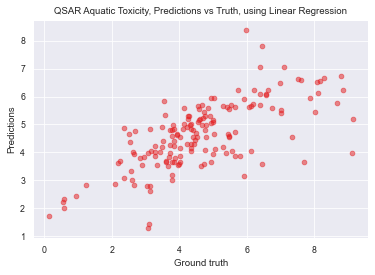

In [29]:
ax = plt.axes()
ax.scatter(y_test, lr_pred, alpha = 0.5)
ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='QSAR Aquatic Toxicity, Predictions vs Truth, using Linear Regression');

In [31]:
#cross  validation and pipeline
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import Pipeline

In [32]:
estimator = Pipeline([("scaler", s), ("regression", lr)])

In [33]:
kf = KFold(n_splits=3, random_state=10, shuffle=True)

In [35]:
predictions = cross_val_predict(estimator, X, y, cv=kf)

In [36]:
r2_score(y, predictions)

0.4747706253593875

In [38]:
#Hyperparameter tuning for Lasso after finding aplhas by GridSearchCV

In [49]:
from sklearn.model_selection import GridSearchCV
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("lasso_regression", Lasso())])
params = {
    'polynomial_features__degree': [1, 2, 3],
    'lasso_regression__alpha': np.geomspace(0.01, 100, 30)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [50]:
grid.fit(X, y)

C:\Users\91726\.conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.093e-01, tolerance: 9.695e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\91726\.conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.362e+01, tolerance: 1.030e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\91726\.conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

GridSearchCV(cv=KFold(n_splits=3, random_state=10, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('lasso_regression', Lasso())]),
             param_grid={'lasso_regression__alpha': array([1.00000000e-02, 1.37382380e-02, 1.88739182e-02, 2.59294380e-02,
       3.56224789e-02, 4.89390092e-02, 6.72335754e-02, 9.23670...
       1.26896100e-01, 1.74332882e-01, 2.39502662e-01, 3.29034456e-01,
       4.52035366e-01, 6.21016942e-01, 8.53167852e-01, 1.17210230e+00,
       1.61026203e+00, 2.21221629e+00, 3.03919538e+00, 4.17531894e+00,
       5.73615251e+00, 7.88046282e+00, 1.08263673e+01, 1.48735211e+01,
       2.04335972e+01, 2.80721620e+01, 3.85662042e+01, 5.29831691e+01,
       7.27895384e+01, 1.00000000e+02]),
                         'polynomial_features__degree': [1, 2, 3]})

In [51]:
grid.best_score_, grid.best_params_

(0.47445181284529553,
 {'lasso_regression__alpha': 0.01, 'polynomial_features__degree': 1})

In [52]:
y_predict_g_lasso = grid.predict(X)

In [53]:
r2_score(y, y_predict_g_lasso)

0.48483603594375246

In [42]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lasso_regression__alpha,param_polynomial_features__degree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006426,0.002541,0.001913,0.000119,0.01,1,"{'lasso_regression__alpha': 0.01, 'polynomial_...",0.488394,0.491795,0.443166,0.474452,0.022166,1
1,0.022058,0.013063,0.002098,0.000468,0.01,2,"{'lasso_regression__alpha': 0.01, 'polynomial_...",0.036786,-0.059072,0.532317,0.170010,0.259161,26
2,0.035976,0.000593,0.003334,0.001177,0.01,3,"{'lasso_regression__alpha': 0.01, 'polynomial_...",-40.536935,-0.120897,0.409068,-13.416255,19.178438,90
3,0.003667,0.000472,0.001348,0.000463,0.013738,1,{'lasso_regression__alpha': 0.0137382379588326...,0.488287,0.491081,0.442901,0.474090,0.022083,2
4,0.017319,0.003289,0.002667,0.000471,0.013738,2,{'lasso_regression__alpha': 0.0137382379588326...,0.023982,0.292948,0.529888,0.282273,0.206673,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.005181,0.000854,0.002021,0.000014,72.789538,2,"{'lasso_regression__alpha': 72.78953843983146,...",-0.000143,-0.000020,-0.000068,-0.000077,0.000051,38
86,0.007441,0.001030,0.002547,0.000410,72.789538,3,"{'lasso_regression__alpha': 72.78953843983146,...",-0.000143,-0.000020,-0.000068,-0.000077,0.000051,38
87,0.004542,0.000424,0.003662,0.000960,100.0,1,"{'lasso_regression__alpha': 100.0, 'polynomial...",-0.000143,-0.000020,-0.000068,-0.000077,0.000051,38
88,0.004596,0.000565,0.002347,0.000437,100.0,2,"{'lasso_regression__alpha': 100.0, 'polynomial...",-0.000143,-0.000020,-0.000068,-0.000077,0.000051,38


In [43]:
#same for ridge regression
from sklearn.model_selection import GridSearchCV
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])
params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(0.01, 100, 30)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [45]:
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=10, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([1.00000000e-02, 1.37382380e-02, 1.88739182e-02, 2.59294380e-02,
       3.56224789e-02...2, 9.23670857e-02,
       1.26896100e-01, 1.74332882e-01, 2.39502662e-01, 3.29034456e-01,
       4.52035366e-01, 6.21016942e-01, 8.53167852e-01, 1.17210230e+00,
       1.61026203e+00, 2.21221629e+00, 3.03919538e+00, 4.17531894e+00,
       5.73615251e+00, 7.88046282e+00, 1.08263673e+01, 1.48735211e+01,
       2.04335972e+01, 2.80721620e+01, 3.85662042e+01, 5.29831691e+01,
       7.27895384e+01, 1.00000000e+02])})

In [46]:
grid.best_score_, grid.best_params_

(0.47459840948442816,
 {'polynomial_features__degree': 1,
  'ridge_regression__alpha': 1.6102620275609392})

In [47]:
y_predict_g_ridge = grid.predict(X)

In [48]:
r2_score(y, y_predict_g_ridge)

0.4860443699559419

In [ ]:
#Using RidgeCv, LassoCV and ElasticNetCv 

In [55]:
from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train, y_train) #no polynomial features

In [56]:
r2_score(y, ridgeCV.predict(X))

0.4842685193595059

In [57]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=3).fit(X_train, y_train)

In [59]:
r2_score(y, lassoCV.predict(X))

0.48345885378839104

In [60]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1e4).fit(X_train, y_train)

In [61]:
r2_score(y, elasticNetCV.predict(X))

0.4834562502082075